<a href="https://colab.research.google.com/github/FrancoCalcia/Analisis-de-datos-con-Pandas/blob/main/An%C3%A1lisis_de_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico - Análisis Exploratorio de Datos

## Integrantes del Grupo:
- **Avecilla Tomás**
- **Calcia Franco**

---

### Descripción:
Este notebook contiene el trabajo práctico realizado para la materia Fundamentos de la Ciencia de Datos.
El objetivo de este trabajo es realizar un análisis exploratorio de datos utilizando Python, seleccionando un dataset de interés, realizando tareas de manipulación y transformación de datos, y llevando a cabo un análisis exploratorio que incluya medidas descriptivas y visualizaciones.

---

### Datasets Seleccionados:
Los conjuntos de datos utilizados en este trabajo se encuentran [aquí](https://drive.google.com/drive/folders/1ldDK76bVk3QfsdO7cE6um-qs2kMtBP3P?usp=sharing). Estos datasets fueron seleccionados por el grupo debido al interés que generó la temática de los crímenes en nosotros, así como por la disponibilidad de datos de diferentes naturalezas que permitirán realizar un análisis exploratorio completo.

---

### Estructura del Notebook:
El notebook se organiza de la siguiente manera:
1. Descripción del Dataset
2. Manipulación y Transformación de los Datasets
3. Análisis Exploratorio de Datos

---



# Descripción de los Conjuntos de Datos de la Ciudad de Los Ángeles



En este notebook se analizarán cuatro conjuntos de datos que contienen información sobre la ciudad de Los Ángeles, California.

## Conjunto de Datos 1: Crímenes
- **Descripción:** Este conjunto de datos contiene información sobre crímenes reportados en la ciudad de Los Ángeles, incluyendo detalles como el tipo de crimen, la fecha y hora, la ubicación, la descripción del crimen, entre otros.
- **Origen:** Los datos fueron obtenidos del sitio web propuesto en el enunciado del trabajo práctico [Datos de Agencias Federales de los EE. UU.](https://catalog.data.gov/dataset/crime-data-from-2020-to-present).  
Cabe destacar que este dataset fue el que originó el tópico a tratar en este trabajo y a partir de él dimos con el resto de datasets.
- **Tipo de Datos:** Datos cuantitativos y cualitativos.

## Conjunto de Datos 2: Divisiones Policiales de Los Ángeles
- **Descripción:** Este conjunto de datos contiene información geográfica sobre la ciudad de Los Ángeles, California. Contiene coordenadas.
- **Origen:** Los datos fueron obtenidos del sitio web [Datos de Agencias Federales de los EE. UU.](https://geohub.lacity.org/datasets/lahub::lapd-divisions/about).  
- **Tipo de Datos:** Datos geoespaciales.

## Conjunto de Datos 3: Geodatos de Estaciones de Policía
- **Descripción:** Este conjunto de datos contiene información geográfica sobre las estaciones de policía en la ciudad de Los Ángeles, incluyendo coordenadas de latitud y longitud.
- **Origen:** Los datos fueron obtenidos del sitio web de [Datos Abiertos de la Ciudad de Los Ángeles](https://geohub.lacity.org/datasets/lahub::lapd-police-stations/explore).
- **Tipo de Datos:** Datos geoespaciales.

Cada conjunto de datos será explorado y analizado individualmente, y posteriormente se realizarán análisis combinados para extraer información significativa sobre la ciudad de Los Ángeles.

---

# Diccionario de Datos

## Dataset 1: Crímenes
- `Report Number`: Número de Reporte del Departamento de Policía de Los Ángeles (LAPD) asociado con el incidente.
- `Reported Date`: Fecha en que se realizó el informe del incidente.
- `Occurred Date`: Fecha en que ocurrió el incidente.
- `Occurred Time`: Hora en que ocurrió el incidente.
- `Area Name`: Nombre del área geográfica donde ocurrió el incidente.
- `Report District Number`: Número de Distrito de Informe.
- `Crime Type`: Indicador de si el delito es de tipo "Part 1" o "Part 2" según la clasificación del LAPD.
- `Crime Code`: Código del Crimen. Según la información del LAPD, a menor número mayor es la seriedad del crimen.
- `Crime Description`: Descripción del Crimen.
- `Modus Operandi Codes`: Códigos de Modus Operandi (M.O.), que describen cómo se cometió el crimen.
- `Victim Age`: Edad de la víctima.
- `Victim Sex`: Sexo de la víctima.
- `Victim Descent`: Descripción de la ascendencia de la víctima.
- `Premises Description`: Descripción de la Premisa donde ocurrió el incidente.
- `Weapon Description`: Descripción del arma utilizada en el incidente.
- `Status`: Estado del incidente.
- `Status Description`: Descripción del estado del incidente.
- `Location`: Ubicación del incidente.
- `Latitude`: Latitud de la ubicación del incidente.
- `Longitude`: Longitud de la ubicación del incidente.

## Dataset 2: Geodatos de Los Ángeles
- `city`: Representación de la Ciudad.
- `objectid`: Identificador único del objeto.
- `geometry`: Geometría de la ciudad, representada como un multipolígono.

## Dataset 3: Geodatos de Estaciones de Policía
- `OBJECTID`: Identificador único del objeto.
- `DIVISION`: División geográfica asociada con la ubicación.
- `LOCATION`: Descripción de la ubicación.
- `PREC`: Número de estación.
- `x`: Coordenada X de la ubicación.
- `y`: Coordenada Y de la ubicación.


# Manipulación y Transformación de los Datasets

### Comenzamos importando las bibliotecas necesarias para el trabajo y descargando los conjuntos de datos

In [2]:
!pip install gdown

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from shapely.geometry import Point, Polygon, LineString
from matplotlib.colors import Normalize
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial import distance

!gdown "1bb3q0Rv7MWZHFRGyj1nH8Pmwjv65eGJa" --output "crimenes_la.csv"
!gdown "1q-df8msS4dorVTD5rvVC5UMZhLRfeaUG" --output "los_angeles.geojson"
!gdown "1BTSmBZbPBB26dsK4gassI8bH6kz5AMIM" --output "estaciones_policia_la.csv"


Downloading...
From (original): https://drive.google.com/uc?id=1bb3q0Rv7MWZHFRGyj1nH8Pmwjv65eGJa
From (redirected): https://drive.google.com/uc?id=1bb3q0Rv7MWZHFRGyj1nH8Pmwjv65eGJa&confirm=t&uuid=ce3b217a-cd46-4eaf-a9d6-d793acd45065
To: /content/crimenes_la.csv
100% 240M/240M [00:03<00:00, 72.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1q-df8msS4dorVTD5rvVC5UMZhLRfeaUG
To: /content/los_angeles.geojson
100% 587k/587k [00:00<00:00, 14.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BTSmBZbPBB26dsK4gassI8bH6kz5AMIM
To: /content/estaciones_policia_la.csv
100% 1.50k/1.50k [00:00<00:00, 6.24MB/s]


In [3]:
# Cargar el conjunto de datos de crímenes
df_crimenes = pd.read_csv('crimenes_la.csv')

# Cargar el conjunto de geodatos de Los Angeles
gdf_los_angeles = gpd.read_file('los_angeles.geojson')

# Cargar el conjunto de geodatos de estaciones de policía
df_estaciones = pd.read_csv('estaciones_policia_la.csv')

### 1.  Dataframe `df_crimenes`

In [4]:
# Se visualiza que el dataset necesita limpieza
df_crimenes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277




---



In [5]:
"""
Eliminamos la hora 12:00:00 AM porque todas las filas contienen el mismo dato.
Esto nos permitirá evitar posibles problemas al analizar los datos más adelante."
"""

df_crimenes["Date Rptd"] = df_crimenes["Date Rptd"].str.replace("12:00:00 AM", "")
df_crimenes["DATE OCC"] = df_crimenes["DATE OCC"].str.replace("12:00:00 AM", "")

In [6]:
"""
Eliminamos algunas columnas que contienen códigos no relevantes para
el análisis, ya que disponemos de otra columna que contiene su descripción.
"""
df_crimenes = df_crimenes.drop("Cross Street", axis = 1) #calle que cruza
df_crimenes = df_crimenes.drop("Premis Cd", axis = 1) # codigo de la premisa
df_crimenes = df_crimenes.drop("Weapon Used Cd",axis = 1) #codigo del arma
df_crimenes = df_crimenes.drop("AREA",axis = 1) #codigo del area
df_crimenes = df_crimenes.drop('Crm Cd 1',axis = 1) # Codigos del crimen. Este se repite
df_crimenes = df_crimenes.drop('Crm Cd 2',axis = 1) # los siguientes no parecen relevantes
df_crimenes = df_crimenes.drop('Crm Cd 3',axis = 1)
df_crimenes = df_crimenes.drop('Crm Cd 4',axis = 1)

In [7]:
"""
Notamos que los nombres de las columnas no eran muy intuitivos,
así que decidimos cambiarlos manualmente.
"""

nuevos_nombres = ['Report Number', 'Reported Date', 'Occurred Date',
                  'Occurred Time','Area Name','Report District Number',
                  'Crime Type','Crime Code','Crime Description',
                  'Modus Operandi Codes','Victim Age','Victim Sex',
                  'Victim Descent','Premises Description','Weapon Description',
                  'Status','Status Description',
                  'Location','Latitude','Longitude']

# Renombrar las columnas del DataFrame
df_crimenes.columns = nuevos_nombres

In [8]:
"""
Se cambió el formato de la hora a uno más legible,
agregando ceros faltantes y los dos puntos para separar.
"""

df_crimenes['Occurred Time'] = df_crimenes['Occurred Time'].astype(str).str.zfill(4)

# Insertar los dos puntos para separar horas y minutos
df_crimenes['Occurred Time'] = df_crimenes['Occurred Time'].str.slice(0, 2) + ':' + df_crimenes['Occurred Time'].str.slice(2, 4)

# eliminar espacios en blanco
df_crimenes['Occurred Date'] = df_crimenes['Occurred Date'].str.strip()
df_crimenes['Reported Date'] = df_crimenes['Reported Date'].str.strip()

# Convertir la columna de fechas
df_crimenes['Occurred Date'] = pd.to_datetime(df_crimenes['Occurred Date'], format='%d/%m/%Y', errors='coerce')
df_crimenes['Reported Date'] = pd.to_datetime(df_crimenes['Reported Date'], format='%d/%m/%Y', errors='coerce')



--------------



In [9]:
"""
Verificamos valores nulos
"""
df_crimenes.isnull().sum()

Report Number                  0
Reported Date             563577
Occurred Date             553938
Occurred Time                  0
Area Name                      0
Report District Number         0
Crime Type                     0
Crime Code                     0
Crime Description              0
Modus Operandi Codes      131889
Victim Age                     0
Victim Sex                125454
Victim Descent            125464
Premises Description         563
Weapon Description        615391
Status                         0
Status Description             0
Location                       0
Latitude                       0
Longitude                      0
dtype: int64



---



Decidimos manejar los datos faltantes de la columna 'Modus Operandi Codes'
asignándoles el código 0, que será considerado como 'sin datos'.

In [10]:
df_crimenes['Modus Operandi Codes'].fillna(0, inplace=True)
df_crimenes['Modus Operandi Codes'].value_counts()

Modus Operandi Codes
0                                131889
0344                              38259
0329                              20414
1822 0344                         12450
1501                               9366
                                  ...  
2000 0913 1814 0444 0416 1202         1
1822 0400 0344 1402                   1
0554 0602 0444 0448 0913              1
1300 1309 1607 0329 0344              1
2047 0400 0429 0444 1202 1822         1
Name: count, Length: 304808, dtype: int64



---




Decidimos manejar los datos faltantes de la columna 'Victim Sex' asignándoles el valor 'Unknown'
para hacerlos más manejables durante el análisis. Además, notamos un valor '-', cuyo significado desconocemos,
pero al no representar una cantidad significativa, decidimos incluirlo en 'Unknown'.
También encontramos un valor 'H' del cual no se especifica su significado, pero al no ser una cantidad considerable,
decidimos dejarlo como está.

In [11]:
df_crimenes['Victim Sex'].fillna('X', inplace=True)
df_crimenes['Victim Sex'].replace('-', 'X', inplace=True)
df_crimenes['Victim Sex'].value_counts()

Victim Sex
M    383635
F    342298
X    212418
H       106
Name: count, dtype: int64


* M - Male
* F - Female
* X - Unknown
* H - No especificado







---



Decidimos manejar los datos faltantes de la columna "Victim Descent" asignandosles
el valor 'Unknown' para que sean mas manejables a la hora del analisis.

In [12]:
df_crimenes['Victim Descent'].fillna('X', inplace=True)
df_crimenes['Victim Descent'].value_counts()

Victim Descent
H    284855
X    220992
W    189494
B    131116
O     73998
A     20519
K      5186
F      4090
C      3791
J      1327
V      1006
I       902
Z       470
P       252
U       196
D        77
G        67
L        66
S        51
-         2
Name: count, dtype: int64

Desde la pagina donde se encuentra el dataset de crimenes pudimos sacar la siguiente informacion:
- A: Other Asian
- B: Black
- C: Chinese
- D: Cambodian
- F: Filipino
- G: Guamanian
- H: Hispanic/Latin/Mexican
- I: American Indian/Alaskan Native
- J: Japanese
- K: Korean
- L: Laotian
- O: Other
- P: Pacific Islander
- S: Samoan
- U: Hawaiian
- V: Vietnamese
- W: White
- X: Unknown
- Z: Asian Indian




---



Decidimos manejar los datos faltantes de la columna "Premises Description" asignandosles
el valor 'Unknown' para que sean mas manejables a la hora del analisis.

In [13]:
df_crimenes['Premises Description'].fillna('Unknown', inplace=True)
df_crimenes['Premises Description'].value_counts()

Premises Description
STREET                                          238521
SINGLE FAMILY DWELLING                          158035
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    114221
PARKING LOT                                      64759
OTHER BUSINESS                                   44705
                                                 ...  
HORSE RACING/SANTA ANITA PARK*                       2
SEWAGE FACILITY/PIPE                                 2
MTA - SILVER LINE - LAC/USC MEDICAL CENTER           2
DEPT OF DEFENSE FACILITY                             2
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
Name: count, Length: 307, dtype: int64



---


Pudimos observar que la cantidad de valores nulos en la columna "Weapon Description" era muy grande, entonces antes del manejo de estos vamos a analizar que contienen.

In [14]:
df_crimenes['Weapon Description'].value_counts()

Weapon Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    173068
UNKNOWN WEAPON/OTHER WEAPON                        35128
VERBAL THREAT                                      23655
HAND GUN                                           19895
SEMI-AUTOMATIC PISTOL                               7172
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [15]:
# Agrupamos por "Crime Description" y contamos los valores nulos en "Weapon Description" para cada grupo
relacion_valores_nulos = df_crimenes.groupby('Crime Description')['Weapon Description'].apply(lambda x: x.isnull().sum())
relacion_valores_nulos.sort_values(ascending=False).head(50)

Crime Description
VEHICLE - STOLEN                                            101110
THEFT OF IDENTITY                                            57863
BURGLARY FROM VEHICLE                                        54749
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      50964
BURGLARY                                                     49689
THEFT PLAIN - PETTY ($950 & UNDER)                           46392
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              36071
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          33242
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     30232
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     24768
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     21624
TRESPASSING                                                  14203
VIOLATION OF RESTRAINING ORDER                               11073
BIKE - STOLEN                                                 7449
LETTERS, LEWD  -  TELEPHONE CALLS, LEWD     

Los crímenes listados probablemente no tengan datos en la columna "Weapon Description" por varias razones:

1. **Naturaleza del Crimen**: Algunos crímenes pueden haber sido perpetrados sin el uso del arma o directamente pueden ser crímenes que no impliquen arma en absoluto.

2. **Falta de Información**: Hay que contemplar el caso de que simplemente no haya habido información por parte de las autoridades o la víctima.

Los crímenes enumerados pueden no tener datos en la columna "Weapon Description" debido a la naturaleza del crimen, el tipo de crimen y la disponibilidad de información sobre el arma utilizada en el momento del crimen.

Además, notemos que existe el valor `'UNKNOWN WEAPON/OTHER WEAPON'`, por lo cual marcar los valores nulos como desconocidos, como anteriormente se propuso, no sería una opción.

También mencionar que la posibilidad de dejarlos nulos o reemplazarlos por algún valor específico quedó descartada desde el momento en que se vio la gran cantidad de valores faltantes en la columna.

**Decidimos como mejor opción cambiar el valor nulo a 'Not Found'**, haciendo referencia a que no hay arma debido a que no fue encontrada por *x* motivo o porque el crimen no requirió de un arma en absoluto.


In [16]:
df_crimenes['Weapon Description'].fillna('Not Found', inplace=True)
df_crimenes['Weapon Description'].value_counts()

Weapon Description
Not Found                                         615391
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    173068
UNKNOWN WEAPON/OTHER WEAPON                        35128
VERBAL THREAT                                      23655
HAND GUN                                           19895
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 80, dtype: int64



---



Para generalizar las áreas a través de los datasets, nos aseguramos
de que los nombres de las áreas estén capitalizados.

In [17]:
df_crimenes['Area Name'] = df_crimenes['Area Name'].str.capitalize()
df_crimenes['Area Name'] = df_crimenes['Area Name'].str.replace('N hollywood', 'North hollywood')
df_crimenes['Area Name'] = df_crimenes['Area Name'].str.replace('West la', 'West los angeles')
df_crimenes['Area Name'].value_counts()

Area Name
Central             63432
77th street         58843
Pacific             54725
Southwest           53067
Hollywood           49298
North hollywood     47456
Southeast           47433
Olympic             47238
Newton              46322
Wilshire            44999
Rampart             43774
West los angeles    42854
Northeast           40044
Van nuys            39966
West valley         39607
Harbor              38861
Devonshire          38660
Topanga             38586
Mission             37489
Hollenbeck          34637
Foothill            31166
Name: count, dtype: int64

### 2.  Dataframe `gdf_los_angeles`

In [18]:
gdf_los_angeles.head()

,OBJECTID,APREC,PREC,AREA,PERIMETER,geometry
0,1,MISSION,19,6.995826e+08,190817.495739,"POLYGON ((6408504.431 1944548.806, 6409580.000..."
1,2,DEVONSHIRE,17,1.346816e+09,175591.702871,"POLYGON ((6408504.431 1944548.806, 6408709.000..."
2,3,FOOTHILL,16,1.297385e+09,203717.879169,"POLYGON ((6436082.000 1929575.125, 6436122.235..."
3,4,TOPANGA,21,9.090326e+08,155505.795458,"POLYGON ((6370761.344 1909803.646, 6370805.000..."
4,5,WEST VALLEY,10,9.364057e+08,136316.899694,"POLYGON ((6391688.000 1903046.000, 6391826.000..."




---



In [19]:
"""
Observamos que no haya valores núlos
"""
gdf_los_angeles.info()
gdf_los_angeles.isnull().sum()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   21 non-null     int64   
 1   APREC      21 non-null     object  
 2   PREC       21 non-null     int64   
 3   AREA       21 non-null     float64 
 4   PERIMETER  21 non-null     float64 
 5   geometry   21 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(1)
memory usage: 1.1+ KB


OBJECTID     0
APREC        0
PREC         0
AREA         0
PERIMETER    0
geometry     0
dtype: int64



---




Para generalizar las áreas a través de los datasets, nos aseguramos
de que los nombres de las áreas estén capitalizados.


In [20]:
gdf_los_angeles['APREC'] = gdf_los_angeles['APREC'].str.capitalize()
gdf_los_angeles['APREC'].value_counts()

APREC
Mission             1
Rampart             1
Harbor              1
Southeast           1
77th street         1
Pacific             1
Newton              1
Southwest           1
Olympic             1
Wilshire            1
Hollenbeck          1
Devonshire          1
West los angeles    1
Hollywood           1
Northeast           1
Van nuys            1
North hollywood     1
West valley         1
Topanga             1
Foothill            1
Central             1
Name: count, dtype: int64



---



<Axes: >

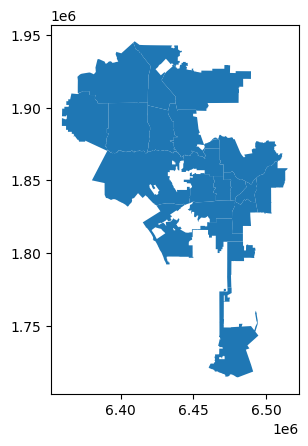

In [21]:
# Visualizamos el mapa
gdf_los_angeles.plot()

### 3. Data frame `df_estaciones`

In [22]:
# Informacion del dataset
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OBJECTID  21 non-null     int64  
 1   DIVISION  21 non-null     object 
 2   LOCATION  21 non-null     object 
 3   PREC      21 non-null     int64  
 4   x         21 non-null     float64
 5   y         21 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.1+ KB


In [23]:
"""
El dataframe de estaciones tenia que ser tratado para convertir sus puntos en datos geoespaciales
"""
# Convertimos las coordenadas 'x' e 'y' en objetos Point
geometry = [Point(xy) for xy in zip(df_estaciones['x'], df_estaciones['y'])]

# Creamos un GeoDataFrame
gdf_estaciones = gpd.GeoDataFrame(df_estaciones, geometry=geometry)

# Mostramos el GeoDataFrame
gdf_estaciones.head()

,OBJECTID,DIVISION,LOCATION,PREC,x,y,geometry
0,1,HARBOR,2175 JOHN S. GIBSON BLVD.,5,6.473747e+06,1.734314e+06,POINT (6473747.205 1734313.753)
1,2,SOUTHEAST,145 W. 108TH ST.,18,6.478137e+06,1.800160e+06,POINT (6478136.920 1800159.995)
2,3,77TH STREET,7600 S. BROADWAY,12,6.477479e+06,1.811691e+06,POINT (6477478.573 1811690.889)
3,4,PACIFIC,12312 CULVER BLVD.,14,6.434404e+06,1.819609e+06,POINT (6434403.509 1819609.350)
4,5,SOUTHWEST,1546 MARTIN LUTHER KING JR. BLVD.,3,6.469193e+06,1.826369e+06,POINT (6469193.370 1826369.315)


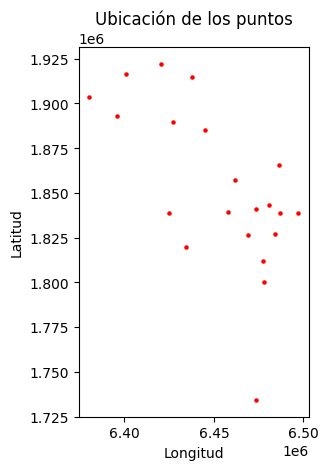

In [24]:
# Graficamos los puntos
gdf_estaciones.plot(marker='o', color='red', markersize=5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicación de los puntos')
plt.show()

In [25]:
# Verificamos valores nulos
df_estaciones.isnull().sum()

OBJECTID    0
DIVISION    0
LOCATION    0
PREC        0
x           0
y           0
dtype: int64

# Análisis Exploratorio de Datos de la Ciudad de Los Ángeles

En este estudio, exploraremos varios aspectos de la ciudad de Los Ángeles a través de los diferentes conjuntos de datos. A través de una serie de preguntas interrelacionadas, buscaremos comprender mejor la dinámica de una de las ciudades más icónicas del mundo.

## Tratemos de entender la actividad criminal en la ciudad de Los Ángeles...




## Informacion central

### Crimenes violentos

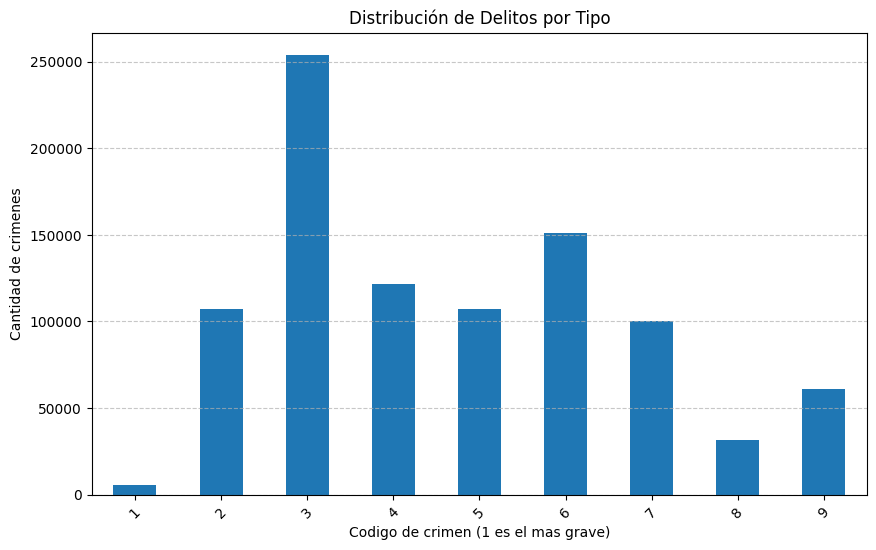

In [26]:
# Contamos la frecuencia de cada tipo de crimen y ordenarmos por el código del crimen
distribucion_delitos = df_crimenes['Crime Code'].value_counts().sort_index()
# Agrupamos por codigos en unidades
distribucion_delitos_agrupada = distribucion_delitos.groupby(distribucion_delitos.index // 100).sum()

# Creamos un gráfico de barras para la distribución de delitos por tipo
plt.figure(figsize=(10, 6))
distribucion_delitos_agrupada.plot(kind='bar')
plt.title('Distribución de Delitos por Tipo')
plt.xlabel('Codigo de crimen (1 es el mas grave)')
plt.ylabel('Cantidad de crimenes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Podemos notar la amplia diferencia que hay entre los crimenes de grado 3 y los demas, teniendo en cuenta que a menor numero mayor es el agravante podemos decir que suelen ocurrir crimenes severos.

### Efectividad policial

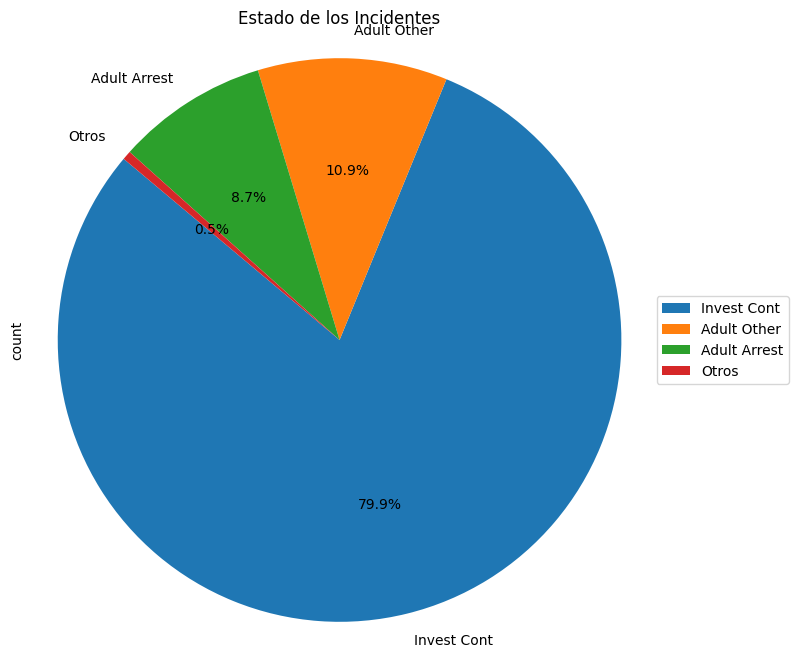

In [27]:
# Contamos la frecuencia de cada estado de incidente
estado_incidentes = df_crimenes['Status Description'].value_counts()

# Creamos una copia del DataFrame de estado_incidentes
estado_incidentes_agrupados = estado_incidentes.copy()

# Agrupamos las categorías con frecuencia muy baja en una categoría "Otros"
umbral = 0.01 * estado_incidentes.sum()  # Define un umbral para determinar qué categorías agrupar
categorias_pequenas = estado_incidentes[estado_incidentes < umbral].index
estado_incidentes_agrupados['Otros'] = estado_incidentes_agrupados[categorias_pequenas].sum()
estado_incidentes_agrupados.drop(categorias_pequenas, inplace=True)

# Creamos un gráfico de pastel para el estado de los incidentes con leyenda lateral y categoría "Otros"
plt.figure(figsize=(8, 8))
estado_incidentes_agrupados.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Estado de los Incidentes')
plt.axis('equal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



*'Invest cont' se refiere a 'investigation continued' o 'Investigación en curso'.*

Es sorprendente la cantidad de crímenes que aún no se han resuelto, especialmente considerando que esta es una de las ciudades más influyentes de América y del mundo.

Es apresurado hacer afirmaciones a estas alturas, pero teniendo en cuenta que los datos analizados son desde 2020 hasta la actualidad, a simple vista, la LAPD debería mejorar o al menos agilizar sus investigaciones...

## ¿Cuál es la distribución de crímenes por área?

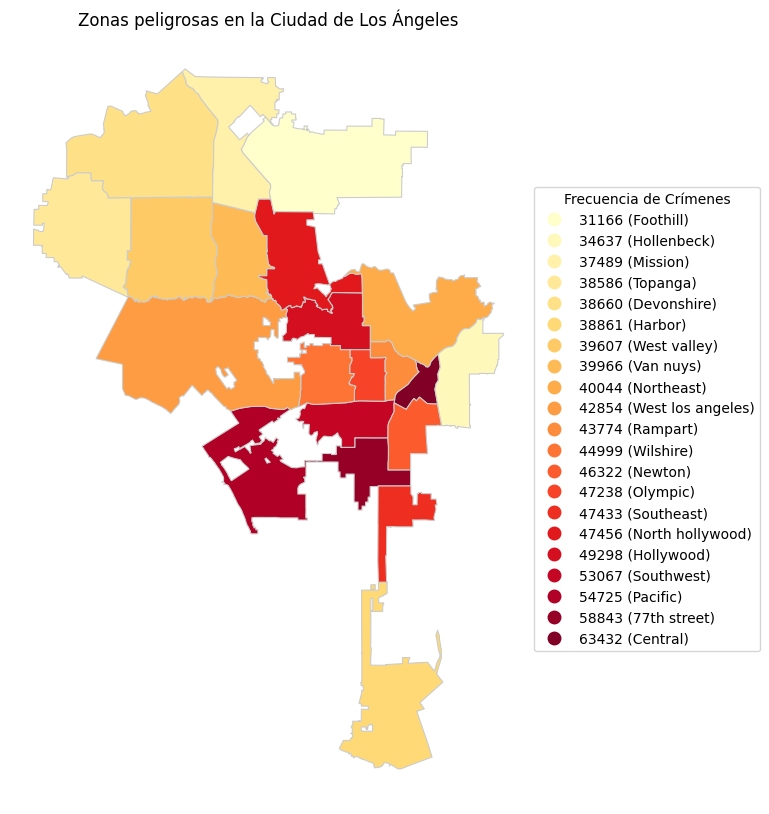

In [28]:
#Contamos la frecuencia de aparición de cada área en el primer DataFrame
frecuencia_areas = df_crimenes['Area Name'].value_counts()
frecuencia_areas = frecuencia_areas.sort_values(ascending=False)
frecuencia_areas = frecuencia_areas.reset_index()
frecuencia_areas.columns = ['Area Name', 'count']

#Fusionamos la frecuencia de aparición con el segundo DataFrame basado en el nombre del área
df_area_crimenes = gdf_los_angeles.merge(frecuencia_areas, left_on='APREC', right_on='Area Name', how='left')
df_area_crimenes.sort_values(by='count', ascending=False, inplace=True)

#Unimos las dos columnas para poder graficar posteriormente el legend
df_area_crimenes['Area_Count'] = df_area_crimenes.apply(lambda row: f"{row['count']} ({row['APREC']})", axis=1)

#Creamos una figura y ejes de Matplotlib
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

#Trazamos el GeoDataFrame utilizando la frecuencia de aparición como intensidad
df_area_crimenes.plot(column='Area_Count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                      legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'title': 'Frecuencia de Crímenes'})

# Agregamos un título y etiquetas de los ejes
ax.set_title('Zonas peligrosas en la Ciudad de Los Ángeles')
ax.set_axis_off()

# Mostramos el mapa de calor
plt.show()

## Delincuencia juvenil
Veamos qué proporción de los crímenes que culminan con un arresto son cometidos por jóvenes.

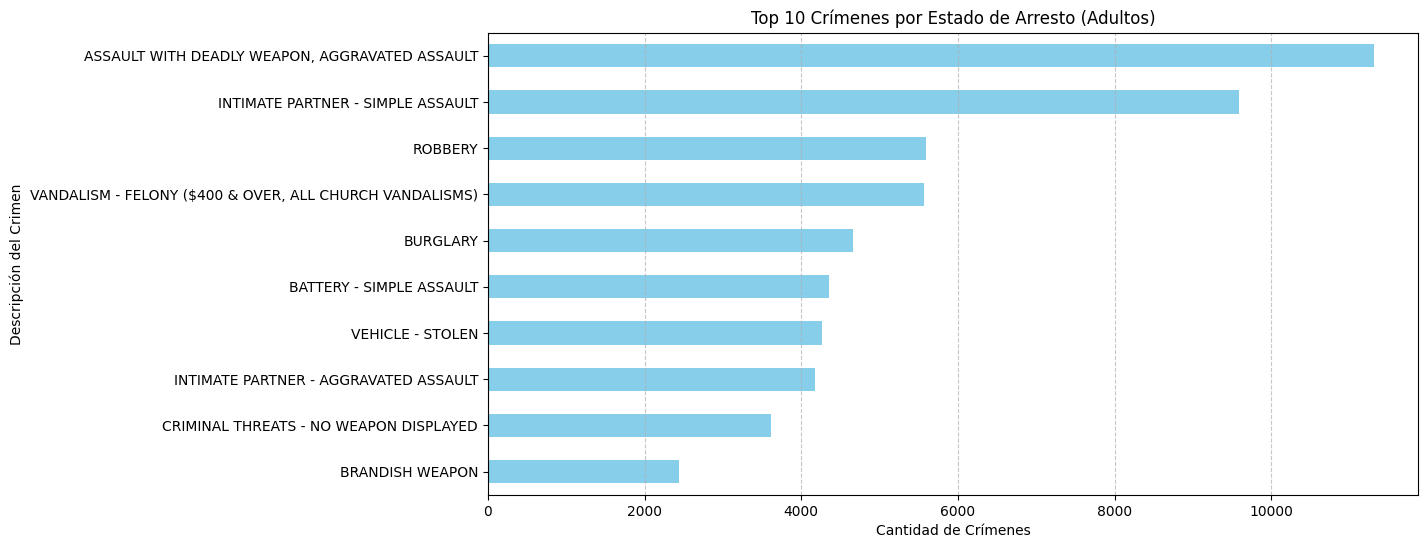

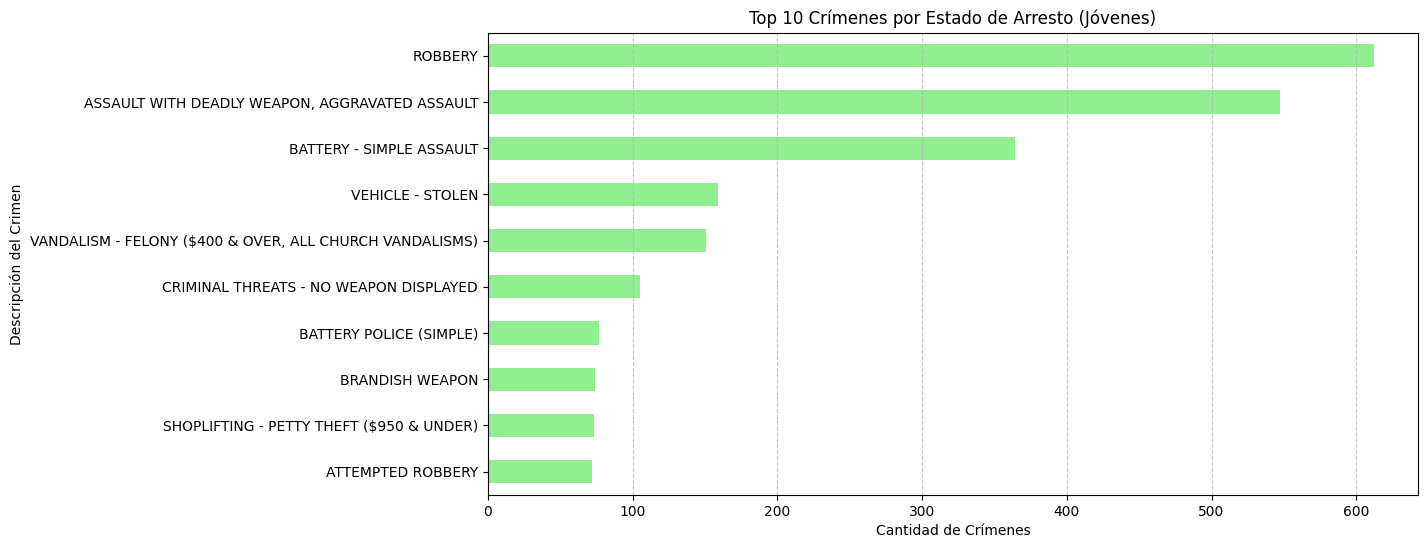

In [29]:
# Recuento de crímenes por estado de arresto para adultos y jovenes
arresto_adultos_crimenes = df_crimenes[df_crimenes["Status Description"] == "Adult Arrest"].groupby("Crime Description").size()
arresto_jovenes_crimenes = df_crimenes[df_crimenes["Status Description"] == "Juv Arrest"].groupby("Crime Description").size()

# Obtenemos los 10 primeros valores del recuento de crímenes por estado de arresto para adultos y jovenes
top_adultos = arresto_adultos_crimenes.sort_values(ascending=False).head(10)
top_jovenes = arresto_jovenes_crimenes.sort_values(ascending=False).head(10)

# Creamos el gráfico de barras horizontales para adultos
plt.figure(figsize=(12, 6))
top_adultos.plot(kind='barh', color='skyblue')
plt.xlabel('Cantidad de Crímenes')
plt.ylabel('Descripción del Crimen')
plt.title('Top 10 Crímenes por Estado de Arresto (Adultos)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

# Creamos el gráfico de barras horizontales para jóvenes
plt.figure(figsize=(12, 6))
top_jovenes.plot(kind='barh', color='lightgreen')
plt.xlabel('Cantidad de Crímenes')
plt.ylabel('Descripción del Crimen')
plt.title('Top 10 Crímenes por Estado de Arresto (Jóvenes)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()


Dado este gráfico, podemos obtener la siguiente información:

1. Los tipos de robo más frecuentes son casi los mismos, sin importar si el delincuente es joven o adulto.
2. Podríamos llegar a decir que la delincuencia juvenil es baja, ya que el delito más cometido por jóvenes es un tercio de la proporción del décimo delito más cometido por adultos.


Dado el primer punto y destacando el protagonismo de los tipos de crimenes 'agresión con arma mortal' y 'robo' nos surgió la pregunta.

### ¿Cuáles son las áreas donde se frecuentan más estos tipos de crímenes?

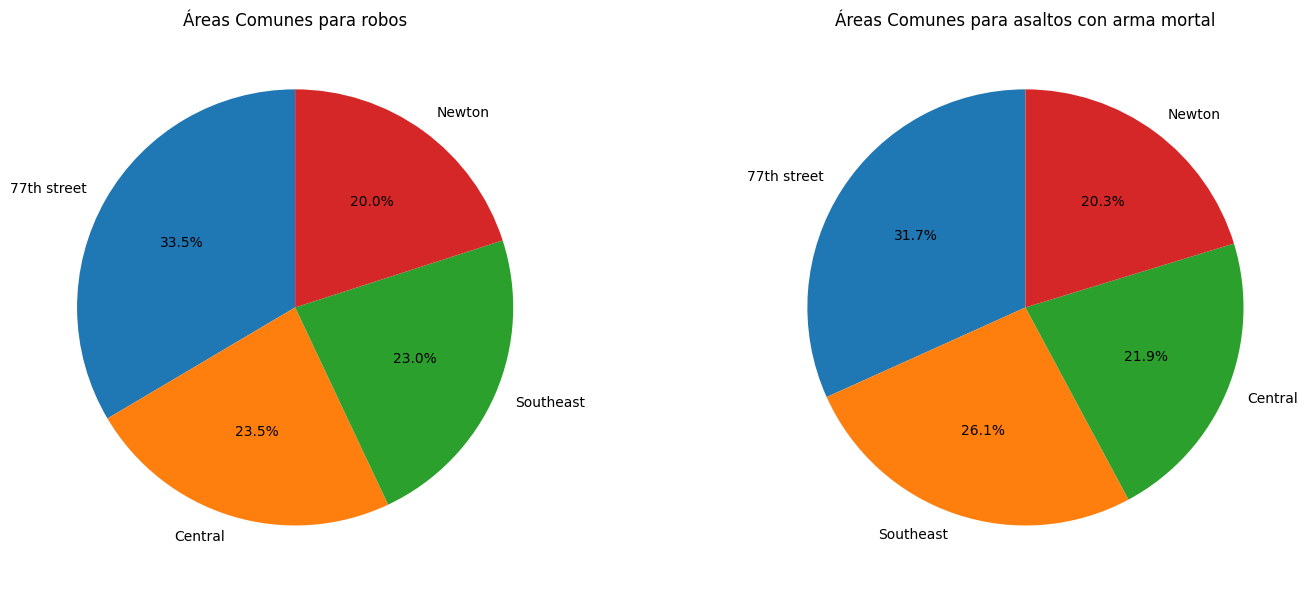

In [30]:
# Filtramos el DataFrame por los tipos de crímenes específicos
crimenes = df_crimenes[df_crimenes["Crime Description"].isin(["ROBBERY", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"])]

# Contamos la cantidad de crímenes por área para cada tipo de crimen
robbery_counts = crimenes[crimenes["Crime Description"] == "ROBBERY"]["Area Name"].value_counts()
assault_counts = crimenes[crimenes["Crime Description"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"]["Area Name"].value_counts()

# Graficamos los gráficos de torta
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
robbery_counts.head(4).plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Áreas Comunes para robos")
plt.ylabel("")

plt.subplot(1, 2, 2)
assault_counts.head(4).plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Áreas Comunes para asaltos con arma mortal")
plt.ylabel("")

plt.tight_layout()
plt.show()


Llegamos a la conclusión de que las cuatro áreas donde más ocurren estos delitos son las mismas, siendo la única diferencia (y muy pequeña) el porcentaje entre ellas.

## Estaciones policiales

El siguiente gráfico nos muestra dónde se encuentran las estaciones policiales de la ciudad.

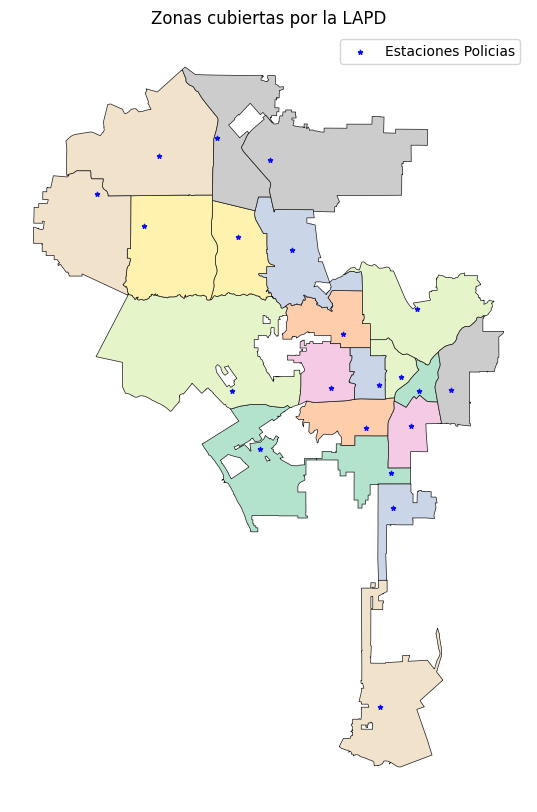

In [31]:
# Creamos una figura y ejes de Matplotlib
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Trazamos el GeoDataFrame. Tengamos en cuenta que el color del fondo del mapa no hace referencia a nada, es simplemente estético.
df_area_crimenes.plot(cmap='Pastel2', linewidth=0.5, ax=ax, edgecolor='0.1', legend=True)

# Trazamos el GeoDataFrame de puntos sobre el mapa
gdf_estaciones.plot(ax=ax, marker='*', color='blue', markersize=10, alpha=0.9, label='Estaciones Policias')

# Agregamos un título y etiquetas de los ejes
ax.set_title('Zonas cubiertas por la LAPD')
ax.set_axis_off()
plt.legend(loc='upper right')
plt.show()

Podemos notar que hay una estacion por distrito

## Tendencias en el tiempo

### ¿Hay patrones de actividad delictiva a lo largo del día? ¿Y a lo largo del año?

**Día**

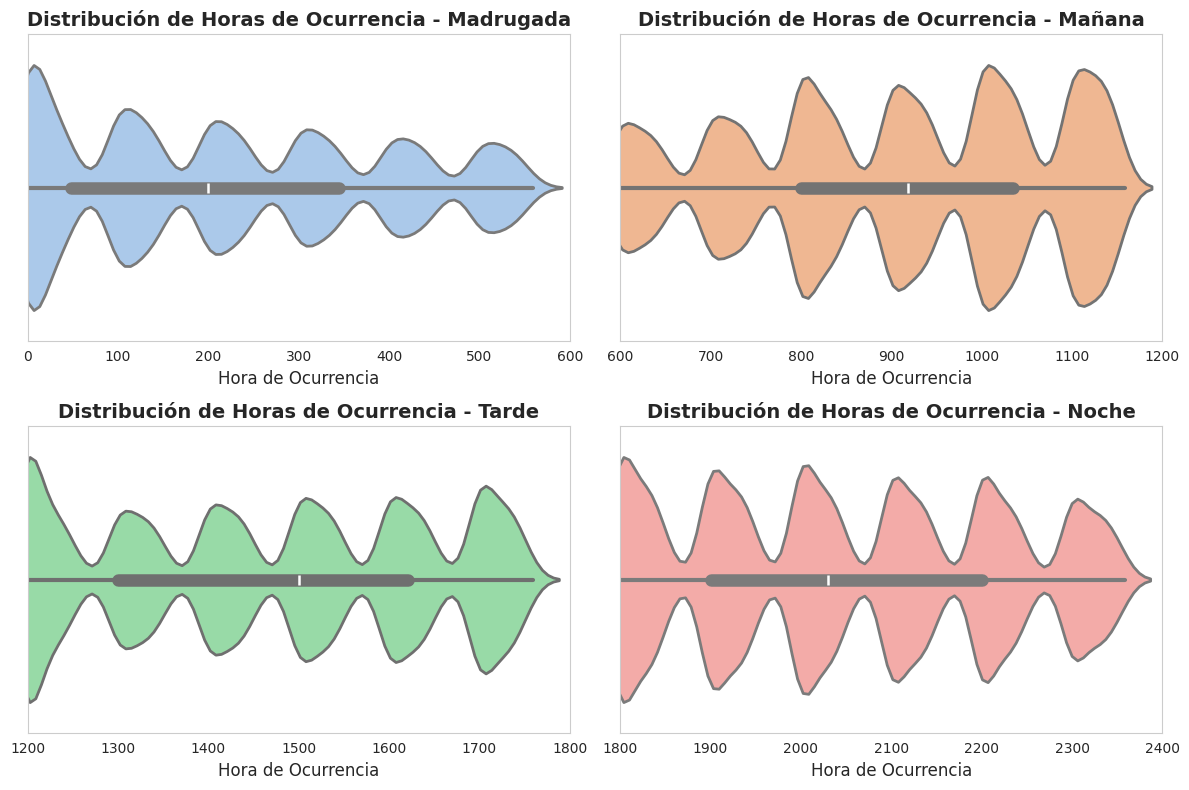

In [32]:
# Convertimos el tiempo a cadena y eliminar los dos puntos para facilitar el análisis
df_crimenes['Occurred Time'] = df_crimenes['Occurred Time'].str.replace(':', '')
df_crimenes['Occurred Time'] = pd.to_numeric(df_crimenes['Occurred Time'], errors='coerce')

# Cambiamos el estilo de Seaborn con solo líneas de cuadrícula horizontales
sns.set_style("whitegrid", {'axes.grid': False})

# Dividimos el día en partes
bins = [0, 600, 1200, 1800, 2400]
labels = ['Madrugada', 'Mañana', 'Tarde', 'Noche']
df_crimenes['Day Part'] = pd.cut(df_crimenes['Occurred Time'], bins=bins, labels=labels, right=False)

# Creamos una figura con 4 subgráficos en dos filas y dos columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

# Definimos los límites del eje x para cada parte del día
x_limits = [(0, 600), (600, 1200), (1200, 1800), (1800, 2400)]

# Paleta de colores personalizada
colors = sns.color_palette("pastel")

# Iteramos sobre las partes del día y crear un diagrama de violín para cada una
for i, (part, x_limit) in enumerate(zip(labels, x_limits)):
    row = i // 2
    col = i % 2
    sns.violinplot(x='Occurred Time', data=df_crimenes[df_crimenes['Day Part'] == part], color=colors[i], ax=axes[row, col], linewidth=2)
    axes[row, col].set_title(f'Distribución de Horas de Ocurrencia - {part}', fontsize=14, fontweight='bold')
    axes[row, col].set_xlabel('Hora de Ocurrencia', fontsize=12)
    axes[row, col].set_ylabel('', fontsize=12)
    axes[row, col].set_xlim(x_limit)
    axes[row, col].tick_params(axis='both', which='major', labelsize=10)

# Ajustamos el diseño de los subgráficos
plt.tight_layout()
plt.show()

Dividimos el día en cuatro partes para entender mejor cómo es la actividad delictiva a lo largo del día. Pudimos visualizar que no hay un patrón específico de delitos acumulados en ciertas horas, sino más bien vemos que las grandes densidades de ocurrencias se presentan varias veces a lo largo del día.

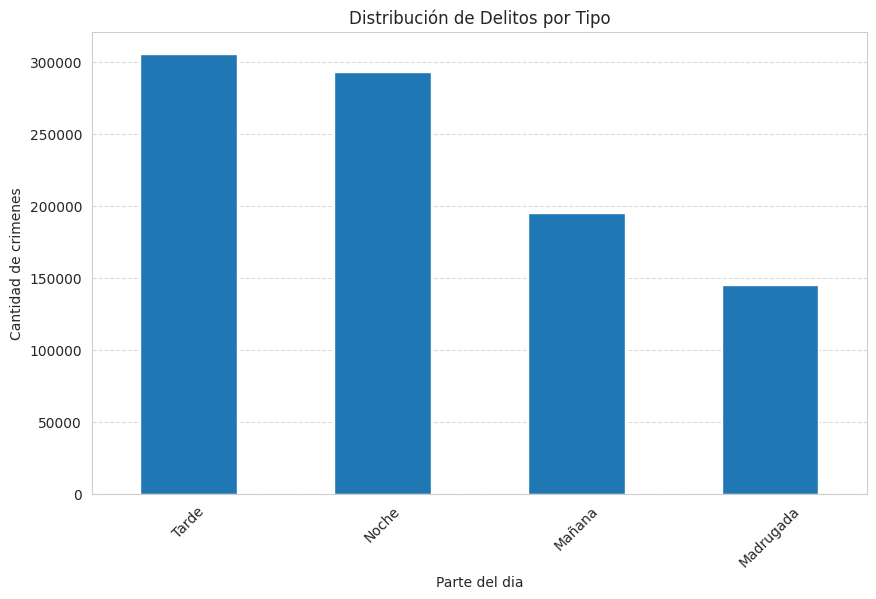

In [33]:
# Hacemos un barplot con los Cantidades
plt.figure(figsize=(10, 6))
df_crimenes['Day Part'].value_counts().plot(kind='bar')
plt.title('Distribución de Delitos por Tipo')
plt.xlabel('Parte del dia')
plt.ylabel('Cantidad de crimenes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Lo que si podemos decir es que a la tarde/noche, como era de esperarse, ocurren la mayor cantidad de crimenes.

In [34]:
#Volvemos a cambiar la columna 'Ocurred Time' para visualizar mejor la información.
df_crimenes['Occurred Time'] = df_crimenes['Occurred Time'].astype(str).str.zfill(4)
df_crimenes['Occurred Time'] = df_crimenes['Occurred Time'].str.slice(0, 2) + ':' + df_crimenes['Occurred Time'].str.slice(2, 4)

#Agrupamos los datos 'Day Part' y 'Ocurred Time'
hour_counts = df_crimenes.groupby(['Day Part', 'Occurred Time']).size().reset_index(name='Count')

**Año**

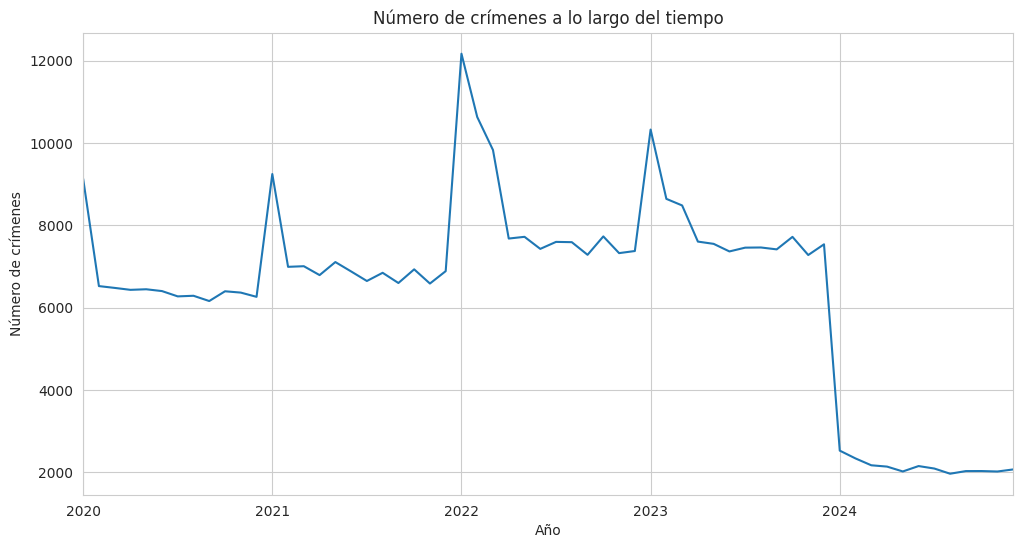

In [35]:
# Crear una nueva columna que solo contenga el año y el mes
df_crimenes['Year-Month'] = df_crimenes['Occurred Date'].dt.to_period('M')

# Contar el número de crímenes por cada mes
crimes_per_month = df_crimenes.groupby('Year-Month').size()
# Graficar los datos con un gráfico de línea y marcador de triángulo hacia arriba
plt.figure(figsize=(12, 6))
crimes_per_month.plot(kind='line',)
plt.title('Número de crímenes a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Número de crímenes')
plt.grid(True)
plt.show()

- **Tendencia Temporal:** Existe una tendencia histórica donde los crímenes tienden a aumentar hacia el último tramo del año.

- **Disminución en 2024:** En 2024, se observó una marcada disminución en los índices delictivos, que ahora se mantienen estables.

Llegamos a la conclusión de que esta variación inesperada en 2024 podría ser porque los datos que tenemos es hasta la actualidad. Este análisis deberíamos repetirlo cuando el año finalice para lograr identificar que variación tuvo respecto de los años anteriores.


### ¿Que tan rapido se reporta un crimen despues de ocurrido?

In [36]:
# Calculamos la diferencia de tiempo en días entre 'Occurred Date' y 'Reported Date'
df_crimenes['Report Delay'] = (df_crimenes['Reported Date'] - df_crimenes['Occurred Date']).dt.days

# Eliminamos filas con diferencias negativas (por si acaso hay errores en los datos)
df_crimenes = df_crimenes[df_crimenes['Report Delay'] >= 0]

# Calculamos el promedio de retraso
demora_promedio = df_crimenes['Report Delay'].mean()
print(f"El promedio de tiempo para reportar un crimen es de {demora_promedio:.2f} días.")

El promedio de tiempo para reportar un crimen es de 33.69 días.


En promedio se tarda **un mes** desde que ocurre un crimen hasta que es reportado...


